In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Synthetic_Products 1.csv')
df.head()

,index,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,...,Retail_price,Product_Url,Brand,Sku,RunDate,unit_price,unit_price_unit,state,city,tid
0,0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1491280P,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,29742568
1,1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1718058P,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,29742569
2,2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,2565429P,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,29742570
3,3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,$4.50 per 1Kg,approx. 750g each,1,...,4.13,https://shop.coles.com.au/a/alexandria/product...,Coles,3199541P,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,29742571
4,4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,$8.75 per 1Kg,1.2kg,0,...,11.00,https://shop.coles.com.au/a/alexandria/product...,Coles,2904193P,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,29742572


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488640 entries, 0 to 488639
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            488640 non-null  int64  
 1   Postal_code      488640 non-null  int64  
 2   Category         488640 non-null  object 
 3   Sub_category     488640 non-null  object 
 4   Product_Group    488640 non-null  object 
 5   Product_Name     488640 non-null  object 
 6   Package_price    487313 non-null  float64
 7   Price_per_unit   485498 non-null  object 
 8   package_size     487869 non-null  object 
 9   is_estimated     488640 non-null  int64  
 10  is_special       488640 non-null  int64  
 11  in_stock         36454 non-null   object 
 12  Retail_price     136953 non-null  float64
 13  Product_Url      488640 non-null  object 
 14  Brand            488640 non-null  object 
 15  Sku              488640 non-null  object 
 16  RunDate          488640 non-null  obje

In [ ]:
# Check for any None or empty values in the DataFrame
if df.isnull().values.any() or df.empty:
  print("DataFrame 'df' contains None or empty values.")
else:
  print("DataFrame 'df' does not contain None or empty values.")

DataFrame 'df' contains None or empty values.


In [ ]:
# Fill null values with the mean of the respective columns
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
    elif pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488640 entries, 0 to 488639
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            488640 non-null  int64  
 1   Postal_code      488640 non-null  int64  
 2   Category         488640 non-null  object 
 3   Sub_category     488640 non-null  object 
 4   Product_Group    488640 non-null  object 
 5   Product_Name     488640 non-null  object 
 6   Package_price    488640 non-null  float64
 7   Price_per_unit   485498 non-null  object 
 8   package_size     487869 non-null  object 
 9   is_estimated     488640 non-null  int64  
 10  is_special       488640 non-null  int64  
 11  in_stock         36454 non-null   object 
 12  Retail_price     488640 non-null  float64
 13  Product_Url      488640 non-null  object 
 14  Brand            488640 non-null  object 
 15  Sku              488640 non-null  object 
 16  RunDate          488640 non-null  obje

In [ ]:
# List of fields unrelated to the price prediction task
fields_to_remove = [
    "index",
    "Product_Url",
    "Sku",
    "tid"
]

# Drop the unrelated fields from the dataframe
df = df.drop(columns=fields_to_remove)

df.head()


,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,RunDate,unit_price,unit_price_unit,state,city
0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE
1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE
2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE
3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,$4.50 per 1Kg,approx. 750g each,1,1,NaN,4.130000,Coles,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE
4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,$8.75 per 1Kg,1.2kg,0,0,NaN,11.000000,Coles,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE


In [ ]:

import re

def standardize_price_unit(price_str):
    price_str = str(price_str)
    match = re.search(r"(\$\d+\.?\d*)", price_str)
    if match:
        price = float(match.group(1)[1:])
    else:
        return np.nan  # or handle the case where no price is found appropriately

    unit_match = re.search(r"per\s+(\d+\.?\d*)\s*(kg|Kg|KG|g|gm|GM|Gm|gM|Gm)", price_str, re.IGNORECASE)
    if unit_match:
        quantity = float(unit_match.group(1))
        unit = unit_match.group(2).lower()

        if unit.startswith('kg'):
            return price / quantity
        elif unit.startswith('g'):
            return (price / quantity) * 1000
        else:
            return np.nan # Handle unknown unit
    else:
        return np.nan

df['price_per_kg'] = df['Price_per_unit'].apply(standardize_price_unit)
df.head()

,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,RunDate,unit_price,unit_price_unit,state,city,price_per_kg
0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,6.50
1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,9.00
2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,7.50
3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,$4.50 per 1Kg,approx. 750g each,1,1,NaN,4.130000,Coles,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,4.50
4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,$8.75 per 1Kg,1.2kg,0,0,NaN,11.000000,Coles,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,8.75


In [ ]:
df = df.drop('Price_per_unit', axis=1)
df.head()

,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,RunDate,unit_price,unit_price_unit,state,city,price_per_kg
0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,approx. 1.1kg,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,6.50
1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,approx. 600g,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,9.00
2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,approx. 600g,1,0,NaN,7.376241,Coles,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,7.50
3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,approx. 750g each,1,1,NaN,4.130000,Coles,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,4.50
4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,1.2kg,0,0,NaN,11.000000,Coles,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,8.75


In [ ]:
df = df.drop(['package_size', 'is_estimated'], axis=1)
df.head()

,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,is_special,in_stock,Retail_price,Brand,RunDate,unit_price,unit_price_unit,state,city,price_per_kg
0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,0,NaN,7.376241,Coles,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,6.50
1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,0,NaN,7.376241,Coles,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,9.00
2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,0,NaN,7.376241,Coles,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,7.50
3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,1,NaN,4.130000,Coles,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,4.50
4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,0,NaN,11.000000,Coles,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,8.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488640 entries, 0 to 488639
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Postal_code      488640 non-null  int64  
 1   Category         488640 non-null  object 
 2   Sub_category     488640 non-null  object 
 3   Product_Group    488640 non-null  object 
 4   Product_Name     488640 non-null  object 
 5   Package_price    488640 non-null  float64
 6   is_special       488640 non-null  int64  
 7   in_stock         36454 non-null   object 
 8   Retail_price     488640 non-null  float64
 9   Brand            488640 non-null  object 
 10  RunDate          488640 non-null  object 
 11  unit_price       488640 non-null  float64
 12  unit_price_unit  485498 non-null  object 
 13  state            488640 non-null  object 
 14  city             488640 non-null  object 
 15  price_per_kg     371351 non-null  float64
dtypes: float64(4), int64(2), object(10)
me

In [ ]:
df['RunDate'] = pd.to_datetime(df['RunDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488640 entries, 0 to 488639
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Postal_code      488640 non-null  int64         
 1   Category         488640 non-null  object        
 2   Sub_category     488640 non-null  object        
 3   Product_Group    488640 non-null  object        
 4   Product_Name     488640 non-null  object        
 5   Package_price    488640 non-null  float64       
 6   is_special       488640 non-null  int64         
 7   in_stock         36454 non-null   object        
 8   Retail_price     488640 non-null  float64       
 9   Brand            488640 non-null  object        
 10  RunDate          488640 non-null  datetime64[ns]
 11  unit_price       488640 non-null  float64       
 12  unit_price_unit  485498 non-null  object        
 13  state            488640 non-null  object        
 14  city             488

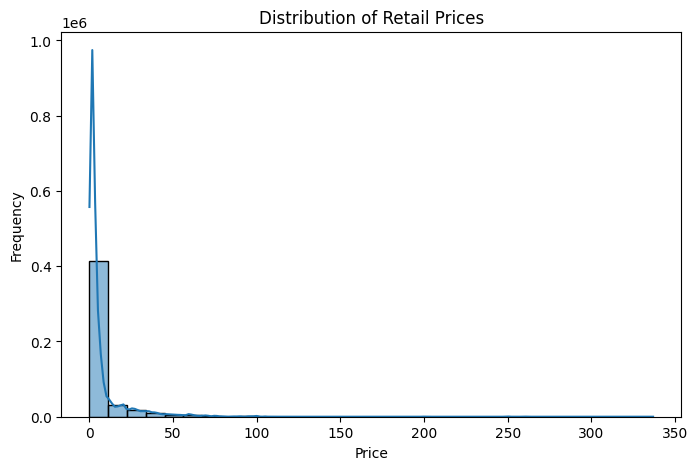

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.histplot(df['unit_price'], bins=30, kde=True)
plt.title('Distribution of Retail Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



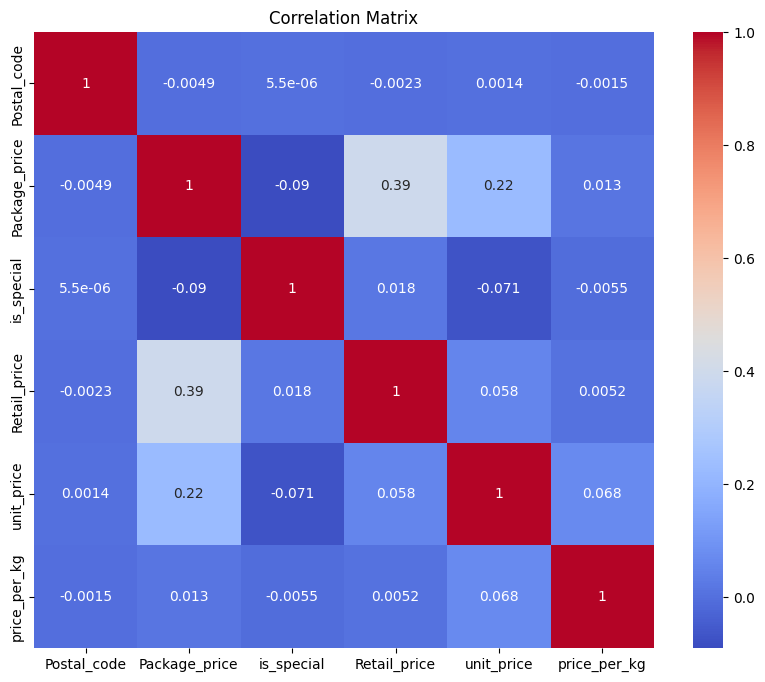

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(df.isnull().sum())


Postal_code             0
Category                0
Sub_category            0
Product_Group           0
Product_Name            0
Package_price           0
is_special              0
in_stock           452186
Retail_price            0
Brand                   0
RunDate                 0
unit_price              0
unit_price_unit      3142
state                   0
city                    0
price_per_kg       117289
dtype: int64


In [ ]:
df['price_per_kg'] = pd.to_numeric(df['price_per_kg'], errors='coerce')  # Ensure it's numeric
df['price_per_kg'].replace(0, pd.NA)  # Replace 0 with NaN

# Drop rows where 'price_per_kg' is NaN
df = df.dropna(subset=['price_per_kg'])

In [ ]:
print(df.isnull().sum())


Postal_code             0
Category                0
Sub_category            0
Product_Group           0
Product_Name            0
Package_price           0
is_special              0
in_stock           343654
Retail_price            0
Brand                   0
RunDate                 0
unit_price              0
unit_price_unit         0
state                   0
city                    0
price_per_kg            0
dtype: int64


In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

#Model building

1
<DatetimeArray>
['2022-11-09 08:23:06']
Length: 1, dtype: datetime64[ns]


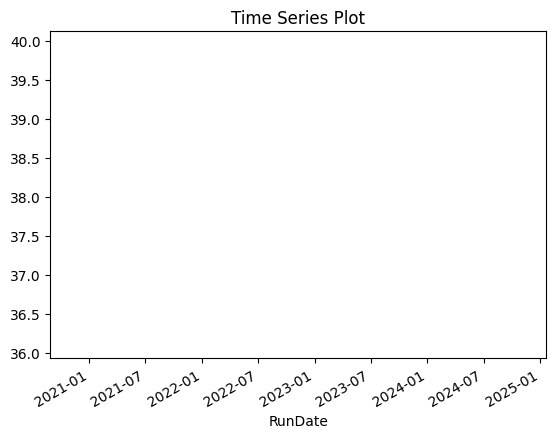

------------------------------------------
count     1.000000
mean     38.026868
std            NaN
min      38.026868
25%      38.026868
50%      38.026868
75%      38.026868
max      38.026868
Name: price_per_kg, dtype: float64
RunDate
2022-11-09 08:23:06    38.026868
Name: price_per_kg, dtype: float64
count    371350.000000
mean         38.026868
std         390.907568
min           0.010000
25%          13.000000
50%          21.330000
75%          36.400000
max       22360.000000
Name: price_per_kg, dtype: float64
RunDate
2022-11-09 08:23:06    38.026868
Name: price_per_kg, dtype: float64
------------------------------------------


ValueError: Invalid input, x is constant

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Data Preparation
df = pd.read_csv('cleaned_data.csv')
# Ensure 'RunDate' is datetime and data is sorted
df['RunDate'] = pd.to_datetime(df['RunDate'])
df = df.sort_values('RunDate')

print(df['RunDate'].nunique())
print(df['RunDate'].unique()[:5])


# Step 2: Aggregate Data
time_series = df.groupby('RunDate')['price_per_kg'].mean()

time_series.plot()
plt.title('Time Series Plot')
plt.show()


print("------------------------------------------")
print(time_series.describe())
print(time_series.head())
print(df['price_per_kg'].describe())
print(df.groupby('RunDate')['price_per_kg'].mean().head())
print("------------------------------------------")

# Step 3: Check for Stationarity
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is NOT stationary. Consider differencing.")

check_stationarity(time_series)

# Step 4: Make Series Stationary (if needed)
# Apply differencing if series is not stationary
if adfuller(time_series)[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
else:
    time_series_diff = time_series

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(time_series_diff, label='Differenced Time Series')
plt.legend()
plt.title("Time Series Data")
plt.show()

# Step 5: Plot ACF and PACF to Determine ARIMA Parameters
plot_acf(time_series_diff, lags=20)
plt.show()

plot_pacf(time_series_diff, lags=20)
plt.show()

# Step 6: Fit ARIMA Model
# Using (p, d, q) = (1, 1, 1) as an example; tune this based on ACF/PACF plots
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Step 7: Forecast Future Prices
forecast_steps = 10  # Number of future periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical Data')
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='orange')
plt.legend()
plt.title("Price Forecast")
plt.show()

# Step 8: Evaluate Model Performance
# Split data into train and test sets for evaluation
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit ARIMA on training data
model_train = ARIMA(train, order=(1, 1, 1))
model_train_fit = model_train.fit()

# Forecast on test data
test_forecast = model_train_fit.forecast(steps=len(test))

# Calculate error
mse = mean_squared_error(test, test_forecast)
print("Mean Squared Error (MSE):", mse)

# Plot actual vs forecasted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, test_forecast, label='Forecasted Prices', color='orange')
plt.legend()
plt.title("Actual vs Forecasted Prices")
plt.show()


#Model building with "Synthetic data"

In [ ]:
new_data = pd.read_csv('Aus_grocery_synthetic_dataset2.csv')

NameError: name 'pd' is not defined

In [ ]:
new_data.info()
new_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187196 entries, 0 to 187195
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Category       187196 non-null  object 
 1   Sub_category   187196 non-null  object 
 2   Product_Group  187196 non-null  object 
 3   Product_Name   187196 non-null  object 
 4   Brand          187196 non-null  object 
 5   Sku            187196 non-null  object 
 6   RunDate        187196 non-null  object 
 7   unit_price_x   187072 non-null  float64
dtypes: float64(1), object(7)
memory usage: 11.4+ MB


,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,1491280P,11/9/2022,6.50
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,1718058P,11/9/2022,9.00
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,2565429P,11/9/2022,7.50
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,3199541P,11/9/2022,4.50
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,2904193P,11/9/2022,8.75


In [ ]:
new_data = new_data[~new_data['unit_price_x'].isin([0]) & new_data['unit_price_x'].notna()]


# Working on cleaned data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Aus_grocery_synthetic_dataset2.csv')
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,1491280P,11/9/2022,6.50
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,1718058P,11/9/2022,9.00
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,2565429P,11/9/2022,7.50
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,3199541P,11/9/2022,4.50
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,2904193P,11/9/2022,8.75


In [ ]:
print(df.isnull().sum())

Category           0
Sub_category       0
Product_Group      0
Product_Name       0
Brand              0
Sku                0
RunDate            0
unit_price_x     124
dtype: int64


We should not use any random nunber for missing price values so removing all rows whose "unit_price_x" value is either "0" or "NaN".

In [ ]:
df = df[(df['unit_price_x'] != 0) & (df['unit_price_x'].notna())]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187072 entries, 0 to 187195
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Category       187072 non-null  object 
 1   Sub_category   187072 non-null  object 
 2   Product_Group  187072 non-null  object 
 3   Product_Name   187072 non-null  object 
 4   Brand          187072 non-null  object 
 5   Sku            187072 non-null  object 
 6   RunDate        187072 non-null  object 
 7   unit_price_x   187072 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.8+ MB


In [ ]:
def parse_mixed_dates(date):
    try:
        # Attempt parsing as MM/DD/YYYY
        return pd.to_datetime(date, format='%m/%d/%Y')
    except ValueError:
        try:
            # Attempt parsing as DD/MM/YYYY
            return pd.to_datetime(date, format='%d/%m/%Y')
        except ValueError:
            return pd.NaT  # Return NaT if both fail

# Apply the function to parse mixed formats
df['RunDate_parsed'] = df['RunDate'].apply(parse_mixed_dates)


In [ ]:
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x,RunDate_parsed
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,1491280P,11/9/2022,6.50,2022-11-09
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,1718058P,11/9/2022,9.00,2022-11-09
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,2565429P,11/9/2022,7.50,2022-11-09
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,3199541P,11/9/2022,4.50,2022-11-09
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,2904193P,11/9/2022,8.75,2022-11-09


In [ ]:
print(df.isnull().sum())

Category          0
Sub_category      0
Product_Group     0
Product_Name      0
Brand             0
Sku               0
RunDate           0
unit_price_x      0
RunDate_parsed    0
dtype: int64


#Outliers detection and removal

In [ ]:
mean = df['unit_price_x'].mean()
std = df['unit_price_x'].std()
df = df[(df['unit_price_x'] >= mean - 3 * std) & (df['unit_price_x'] <= mean + 3 * std)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182750 entries, 0 to 187195
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        182750 non-null  object        
 1   Sub_category    182750 non-null  object        
 2   Product_Group   182750 non-null  object        
 3   Product_Name    182750 non-null  object        
 4   Brand           182750 non-null  object        
 5   Sku             182750 non-null  object        
 6   RunDate         182750 non-null  object        
 7   unit_price_x    182750 non-null  float64       
 8   RunDate_parsed  182750 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 13.9+ MB


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['unit_price_x'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -36.830102679978864
p-value: 0.0


The results of your Augmented Dickey-Fuller (ADF) test indicate the following:

### ADF Test Results:
- **ADF Statistic**: `-36.83`
  - A very low ADF statistic indicates strong evidence against the null hypothesis of non-stationarity.
- **p-value**: `0.0`
  - A p-value of `0.0` (or close to 0) is far below the typical significance level (e.g., 0.05), meaning we reject the null hypothesis of non-stationarity.

---

### Interpretation:
1. **Stationarity**:
   - The time series is **stationary**, meaning it does not have a unit root. Stationarity is a key requirement for ARIMA modeling.

2. **Next Steps**:
   - Since the series is already stationary, you **do not need to difference the series** further.
   - Proceed with fitting the ARIMA model, starting with `d=0` (no differencing).



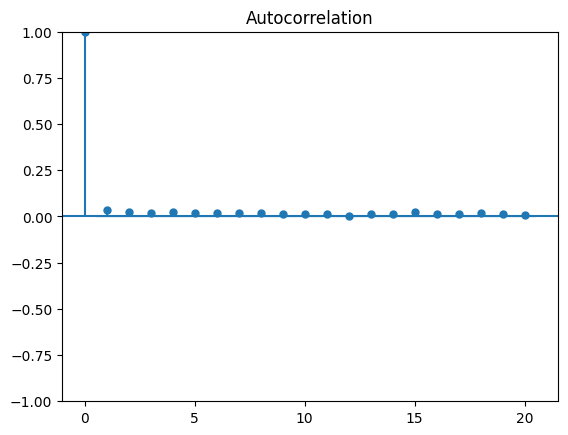

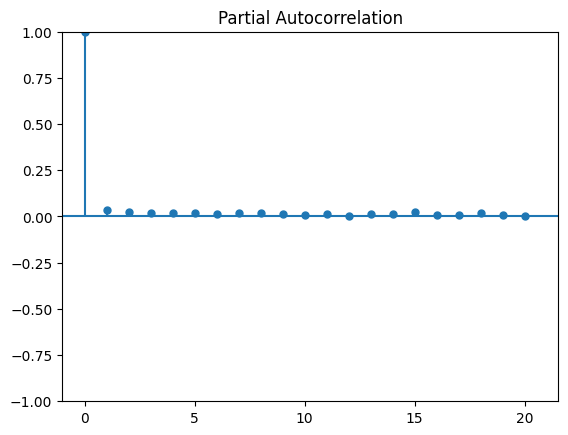

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           unit_price_x   No. Observations:               182750
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -684746.837
Date:                Mon, 02 Dec 2024   AIC                        1369501.673
Time:                        07:48:41   BIC                        1369542.137
Sample:                             0   HQIC                       1369513.630
                             - 182750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9314      0.134     51.612      0.000       6.668       7.195
ar.L1          0.9944      0.001   1904.323      0.000       0.993       0.995
ma.L1         -0.9852      0.001  -1166.953      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


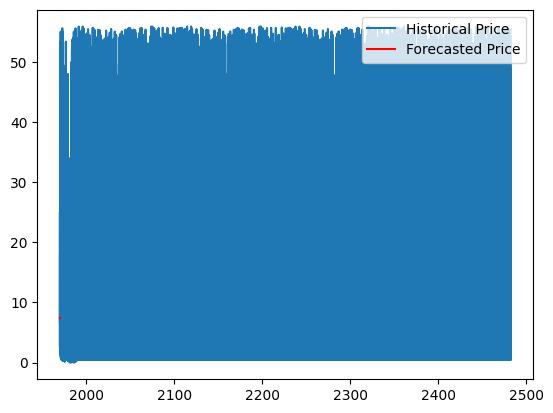

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['unit_price_x'], lags=20)  # Autocorrelation plot
plot_pacf(df['unit_price_x'], lags=20)  # Partial autocorrelation plot
plt.show()

# Based on ACF/PACF, determine p and q (example: p=1, q=1 for simplicity)
# You can adjust these based on the ACF and PACF plots or domain knowledge

# 4. ARIMA Model fitting
p = 1  # Autoregressive order (p)
d = 0  # Differencing order (d) as series is stationary
q = 1  # Moving average order (q)

# Fit the ARIMA model
model = ARIMA(df['unit_price_x'], order=(p, d, q))
model_fit = model.fit()

# 5. Model Summary
print(model_fit.summary())

# 6. Predict the next 'n' values (forecasting)
n_forecast = 10  # Number of periods to forecast
forecast = model_fit.forecast(steps=n_forecast)

# Plot the forecasted values
plt.plot(df.index, df['unit_price_x'], label='Historical Price')
forecast_index = pd.date_range(start=df.index[-1], periods=n_forecast+1, freq='D')[1:]
plt.plot(forecast_index, forecast, label='Forecasted Price', color='red')

plt.legend()
plt.show()


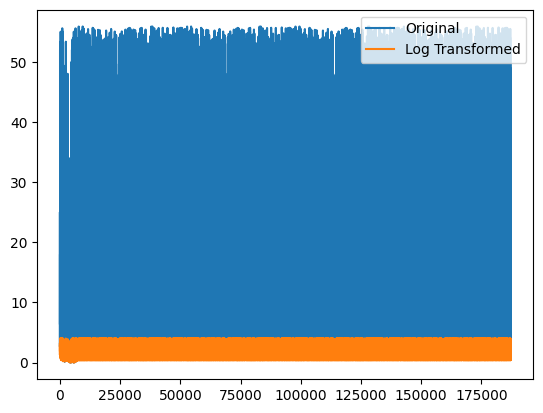

In [ ]:
import numpy as np

# Apply log transformation (add a small constant to avoid log(0))
df['unit_price_x_log'] = np.log(df['unit_price_x'] + 1)

# Plot the transformed data to check the effect
plt.plot(df['unit_price_x'], label='Original')
plt.plot(df['unit_price_x_log'], label='Log Transformed')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['unit_price_x_log'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("Log-transformed data is stationary.")
else:
    print("Log-transformed data is not stationary.")


ADF Statistic: -37.36749833823146
p-value: 0.0
Log-transformed data is stationary.


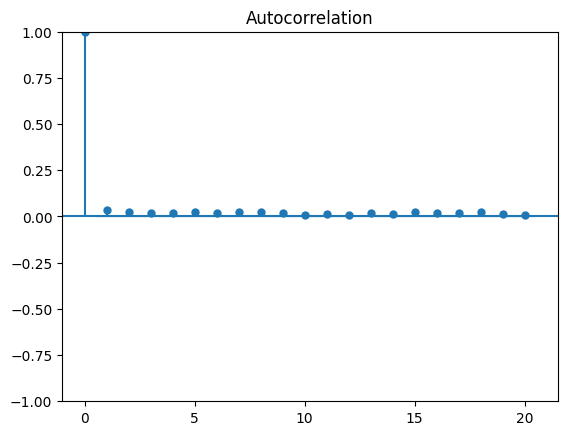

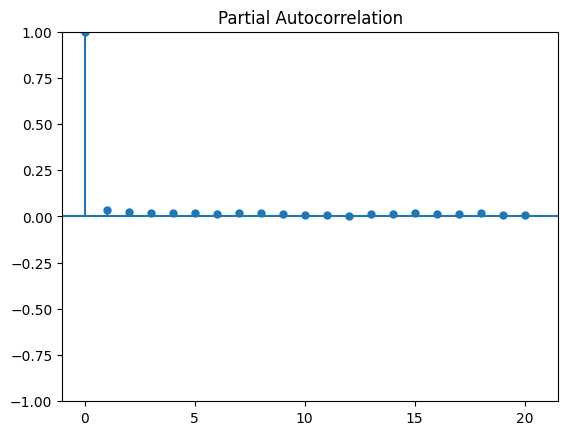

In [ ]:
plot_acf(df['unit_price_x_log'], lags=20)
plot_pacf(df['unit_price_x_log'], lags=20)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       unit_price_x_log   No. Observations:               182750
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -247344.611
Date:                Mon, 02 Dec 2024   AIC                         494697.221
Time:                        08:08:46   BIC                         494737.685
Sample:                             0   HQIC                        494709.177
                             - 182750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5452      0.008    195.216      0.000       1.530       1.561
ar.L1          0.9954      0.000   2057.278      0.000       0.994       0.996
ma.L1         -0.9864      0.001  -1235.569      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


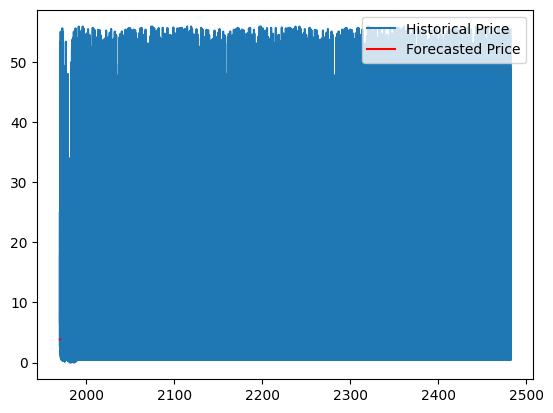

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Replace p and q based on ACF/PACF analysis
p = 1
q = 1
model = ARIMA(df['unit_price_x_log'], order=(p, 0, q))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())
n_forecast = 10  # Number of steps to forecast
forecast_log = model_fit.forecast(steps=n_forecast)

# Inverse log transformation
forecast_original = np.exp(forecast_log) - 1

# Plot results
forecast_index = pd.date_range(start=df.index[-1], periods=n_forecast+1, freq='D')[1:]
plt.plot(df.index, df['unit_price_x'], label='Historical Price')
plt.plot(forecast_index, forecast_original, label='Forecasted Price', color='red')
plt.legend()
plt.show()


#SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Check for missing values
df = df.dropna(subset=['unit_price_x'])

train_size = int(len(df) * 0.8)
train, test = df['unit_price_x'][:train_size], df['unit_price_x'][train_size:]

# SARIMAX model
model = SARIMAX(train,
                order=(1, 0, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit(disp=False)

# Print the summary of the model
print(model_fit.summary())

forecast = model_fit.get_forecast(steps=len(test))

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['unit_price_x'], label='Historical Price')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecasted Price')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Model - Price Forecasting')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

##Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Aus_grocery_synthetic_dataset2.csv')
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,1491280P,11/9/2022,6.50
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,1718058P,11/9/2022,9.00
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,2565429P,11/9/2022,7.50
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,3199541P,11/9/2022,4.50
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,2904193P,11/9/2022,8.75


##Removing all rows whose "unit_price_x value is either "0" or "NaN".

In [2]:
df = df[(df['unit_price_x'] != 0) & (df['unit_price_x'].notna())]

#Transfering date column type to "DateTimeObject"

In [3]:
def parse_mixed_dates(date):
    try:
        # Attempt parsing as MM/DD/YYYY
        return pd.to_datetime(date, format='%m/%d/%Y')
    except ValueError:
        try:
            # Attempt parsing as DD/MM/YYYY
            return pd.to_datetime(date, format='%d/%m/%Y')
        except ValueError:
            return pd.NaT  # Return NaT if both fail

# Apply the function to parse mixed formats
df['RunDate_parsed'] = df['RunDate'].apply(parse_mixed_dates)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187072 entries, 0 to 187195
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        187072 non-null  object        
 1   Sub_category    187072 non-null  object        
 2   Product_Group   187072 non-null  object        
 3   Product_Name    187072 non-null  object        
 4   Brand           187072 non-null  object        
 5   Sku             187072 non-null  object        
 6   RunDate         187072 non-null  object        
 7   unit_price_x    187072 non-null  float64       
 8   RunDate_parsed  187072 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 14.3+ MB


In [5]:
print(df.describe())


        unit_price_x                 RunDate_parsed
count  187072.000000                         187072
mean        8.537730  2020-08-02 16:01:26.058843392
min         0.010000            2020-01-01 00:00:00
25%         1.320000            2020-04-05 00:00:00
50%         3.050000            2020-07-08 00:00:00
75%         7.120000            2020-10-11 00:00:00
max       337.830000            2023-01-17 00:00:00
std        15.779829                            NaN


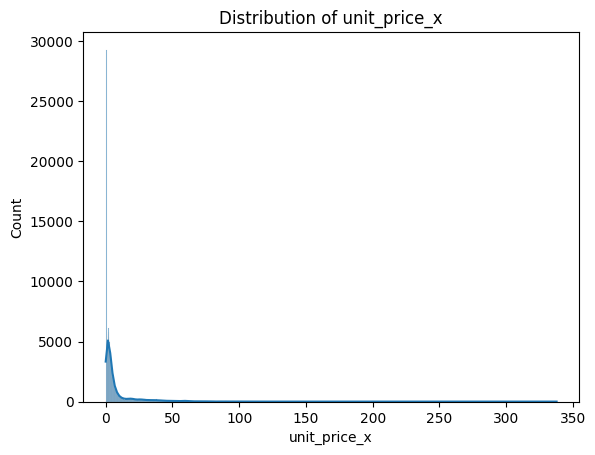

In [6]:
# Plot for unit_price_x
sns.histplot(df['unit_price_x'], kde=True)
plt.title('Distribution of unit_price_x')
plt.show()


##Normaliz the "unit_price_x" column

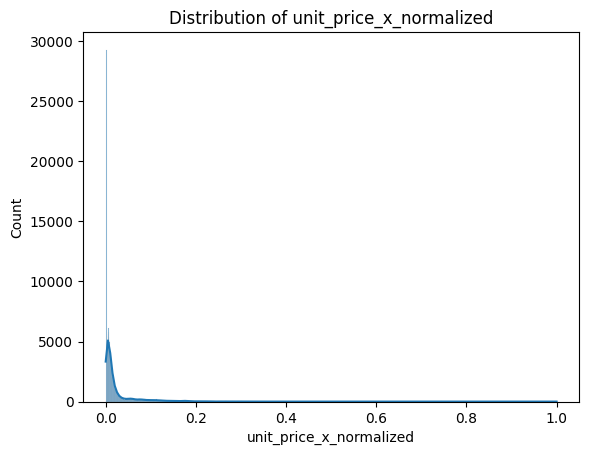

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the unit_price_x column
df['unit_price_x_normalized'] = scaler.fit_transform(df[['unit_price_x']])

# Check the result
# Plot for unit_price_x
sns.histplot(df['unit_price_x_normalized'], kde=True)
plt.title('Distribution of unit_price_x_normalized')
plt.show()


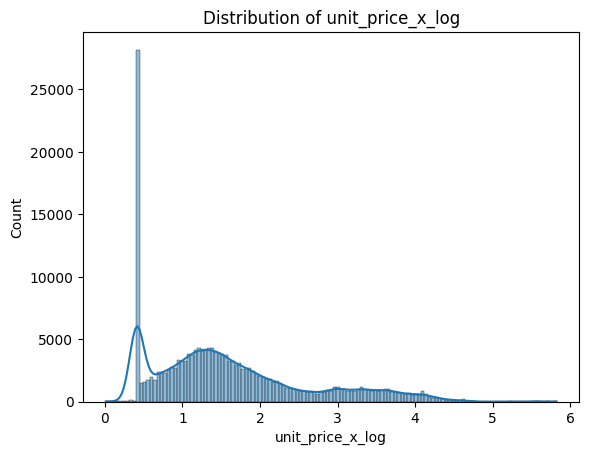

In [8]:
# Apply log transformation
df['unit_price_x_log'] = np.log1p(df['unit_price_x'])

# Check the result
# Plot for unit_price_x
sns.histplot(df['unit_price_x_log'], kde=True)
plt.title('Distribution of unit_price_x_log')
plt.show()



ADF Statistic: -36.24285005432545
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

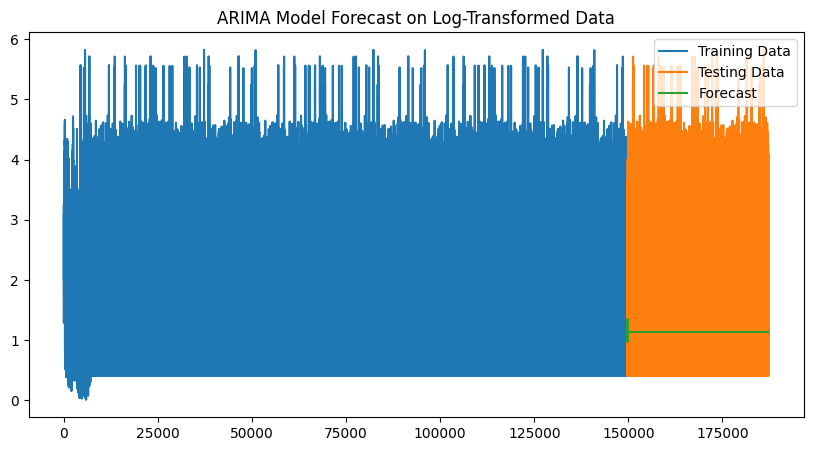

ARIMA model summary:
                               SARIMAX Results                                
Dep. Variable:       unit_price_x_log   No. Observations:               149657
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -224407.029
Date:                Thu, 05 Dec 2024   AIC                         448826.059
Time:                        09:54:10   BIC                         448885.555
Sample:                             0   HQIC                        448843.793
                             - 149657                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8220      0.003   -328.281      0.000      -0.827      -0.817
ar.L2         -0.6548      0.003   -208.496      0.000      -0.661      -0.649
ar.L3         -0.4933      0.00

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Check for stationarity on log-transformed data
price_data_log = df['unit_price_x_log']
result = adfuller(price_data_log)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if necessary
if result[1] > 0.05:
    price_data_log = price_data_log.diff().dropna()

# Split data
train_size = int(len(price_data_log) * 0.8)
train, test = price_data_log[:train_size], price_data_log[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(forecast_index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast on Log-Transformed Data')
plt.show()

print("ARIMA model summary:")
print(model_fit.summary())


# Calculate performance metrics

Mean Absolute Error (MAE): 0.8223833562525744
Mean Squared Error (MSE): 1.268922203367347
Root Mean Squared Error (RMSE): 1.1264644705304057
R-Squared: -0.2152619117085326


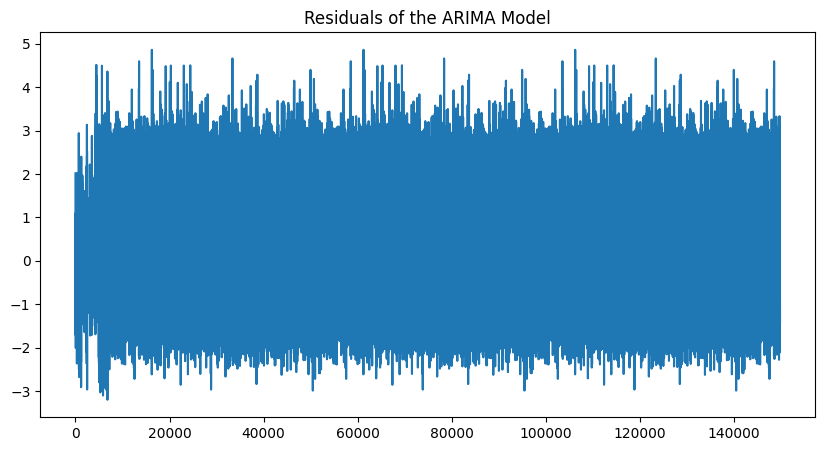

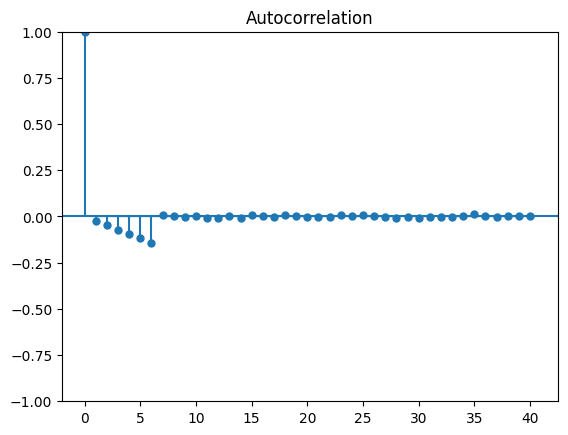

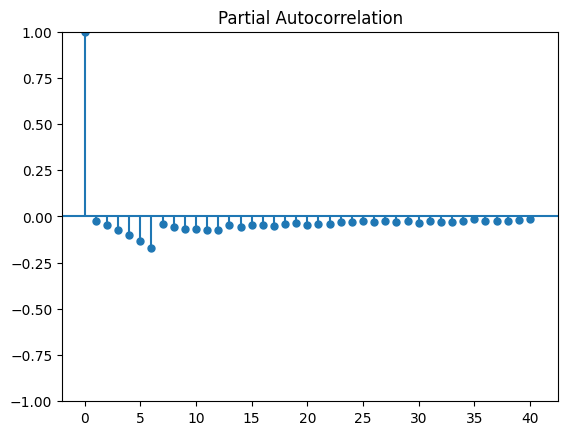

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forecast_array = np.array(forecast)
mae = mean_absolute_error(test, forecast_array)
mse = mean_squared_error(test, forecast_array)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast_array)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")

# Optional: Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

# ACF/PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=40)
plt.show()
plot_pacf(residuals, lags=40)
plt.show()


#Model saving

In [12]:
import pickle
with open('arima_model_log_normalization.pkl', 'wb') as pkl:
  pickle.dump(model_fit, pkl)

#Performing above same steps with "MinMax Scaler" Normalization

ADF Statistic: -39.37400730717811
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

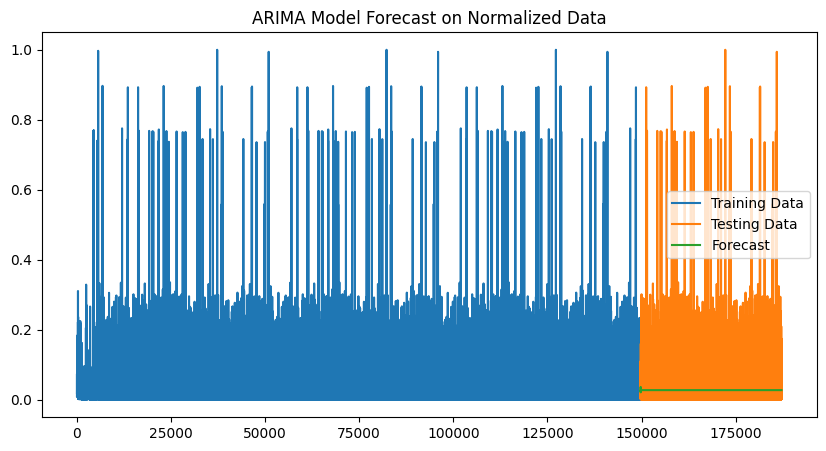

ARIMA model summary:
                                  SARIMAX Results                                  
Dep. Variable:     unit_price_x_normalized   No. Observations:               149657
Model:                      ARIMA(5, 1, 0)   Log Likelihood              236908.887
Date:                     Thu, 05 Dec 2024   AIC                        -473805.773
Time:                             10:04:18   BIC                        -473746.277
Sample:                                  0   HQIC                       -473788.039
                                  - 149657                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8262      0.001   -556.541      0.000      -0.829      -0.823
ar.L2         -0.6613      0.002   -352.592      0.000      -0.665    

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Check for stationarity on log-transformed data
price_data_normalized = df['unit_price_x_normalized']
result = adfuller(price_data_normalized)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if necessary
if result[1] > 0.05:
    price_data_normalized = price_data_normalized.diff().dropna()

# Split data
train_size = int(len(price_data_normalized) * 0.8)
train, test = price_data_normalized[:train_size], price_data_normalized[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(forecast_index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast on Normalized Data')
plt.show()

print("ARIMA model summary:")
print(model_fit.summary())


# Calculate performance metrics

Mean Absolute Error (MAE): 0.028580670549926582
Mean Squared Error (MSE): 0.0022606098586956725
Root Mean Squared Error (RMSE): 0.04754587110039812
R-Squared: -0.0019666218873510832


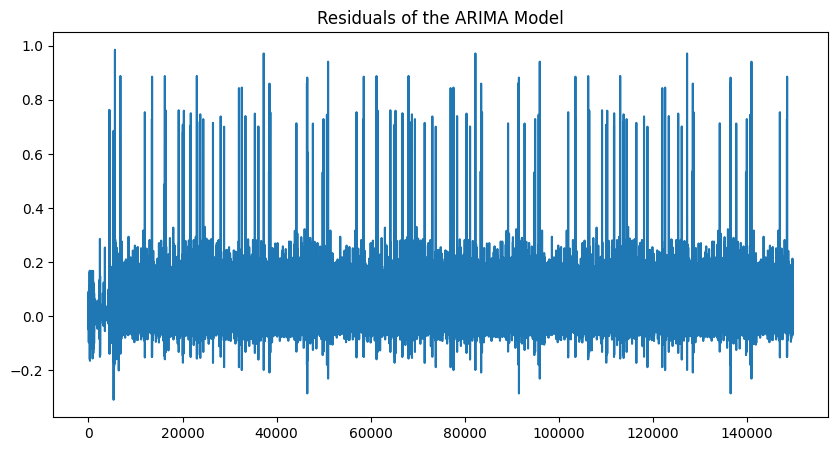

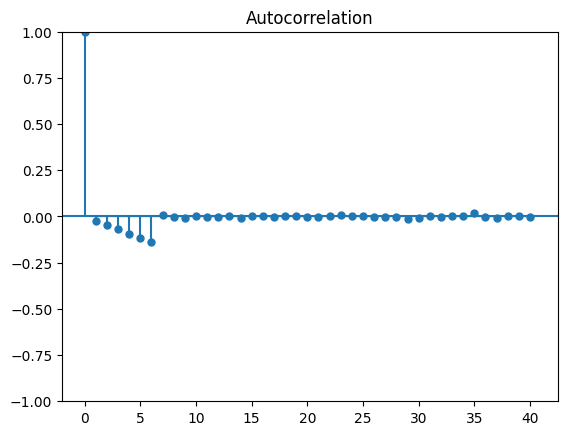

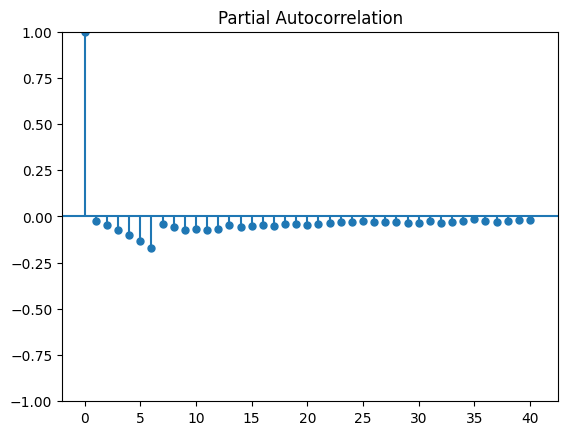

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forecast_array = np.array(forecast)
mae = mean_absolute_error(test, forecast_array)
mse = mean_squared_error(test, forecast_array)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast_array)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")

# Optional: Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

# ACF/PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=40)
plt.show()
plot_pacf(residuals, lags=40)
plt.show()


In [15]:
import pickle
with open('arima_model_MinMax_normalization.pkl', 'wb') as pkl:
  pickle.dump(model_fit, pkl)